# Import software libraries

In [86]:
# Import required libraries.
import sys                                                  # Read system parameters.
import numpy as np                                          # Work with multi-dimensional arrays.
import pandas as pd                                         # Manipulate and analyze data.
import matplotlib                                           # Create and format charts.
import matplotlib.pyplot as plt  
import seaborn as sns                                       # Make charting easier.
import sklearn                                              # Train and evaluate machine learning models.
from sklearn.model_selection import train_test_split, \
                                    learning_curve, \
                                    cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, \
                            confusion_matrix, \
                            classification_report, \
                            scorer, \
                            f1_score, \
                            recall_score, \
                            precision_score, \
                            roc_auc_score, \
                            plot_roc_curve, \
                            plot_precision_recall_curve, \
                            plot_confusion_matrix
from sklearn.dummy import DummyClassifier
import xgboost                                              # Build gradient boosting models.
from xgboost import XGBClassifier
import pickle                                               # Save Python objects as binary files.
from collections import Counter
import warnings                                             # Suppress warnings.
warnings.filterwarnings('ignore')

# Ensure results are reproducible.
np.random.seed(1)

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- Seaborn {}'.format(sns.__version__))
print('- scikit-learn {}'.format(sklearn.__version__))
print('- XGBoost {}'.format(xgboost.__version__))

Libraries used in this project:
- Python 3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) 
[GCC 7.3.0]
- NumPy 1.19.2
- pandas 1.1.3
- Matplotlib 3.3.2
- Seaborn 0.11.0
- scikit-learn 0.23.2
- XGBoost 1.3.3


# Read and examine the data

In [87]:
# Read the data.
customer_data = pd.read_pickle('../Projects/data/customer_data.pickle')


# Preview the first five rows of the data.
customer_data.head(5)

,frequency,recency,tenure,monetary_value,number_unique_items,churned
u12747,6.0,367.0,369.0,39.19,3,True
u12748,41.0,365.0,369.0,12.01,9,False
u12749,2.0,127.0,130.0,22.28,2,True
u1282,0.0,0.0,326.0,0.00,1,False
u12822,0.0,0.0,87.0,0.00,1,True


In [88]:
# Check the structure of the data.
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2130 entries, u12747 to u18283
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   frequency            2130 non-null   float64
 1   recency              2130 non-null   float64
 2   tenure               2130 non-null   float64
 3   monetary_value       2130 non-null   float64
 4   number_unique_items  2130 non-null   int64  
 5   churned              2130 non-null   bool   
dtypes: bool(1), float64(4), int64(1)
memory usage: 101.9+ KB


# Prepare the data

In [89]:
# Define the target variable and get the count of each value in the variable.
#churned is our target variable
target_data = customer_data.churned
target_data.value_counts(normalize=True)

False    0.647887
True     0.352113
Name: churned, dtype: float64

In [90]:
# Split the data into target and features.
features=customer_data.drop(['churned'], axis=1)

In [91]:
# Split the dataset into separate training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(features,
                                                   target_data,
                                                   test_size=0.3)




# Get the shape of both the training dataset and the test dataset.

print('Training data features:', X_train.shape)
print('Training data target:', y_train.shape)

Training data features: (1491, 5)
Training data target: (1491,)


In [92]:
# Use the Counter library to get the count of each value in the target variable (test data).
print('The count of values in the target variable i.e.\
churned', Counter(y_test))


The count of values in the target variable i.e.churned Counter({False: 414, True: 225})


# Train a logistic regression model

In [93]:
# Normalize the training data.
norm = MinMaxScaler().fit(X_train)

X_train_norm = norm.transform(X_train)

print('Maximum :', np.min(X_train_norm))
print('Maximum :', np.max(X_train_norm))

Maximum : 0.0
Maximum : 1.0


In [94]:
# Create a LogisticRegression() model and fit it on the scaled training data.
logreg = LogisticRegression()

logreg.fit(X_train_norm, y_train)

LogisticRegression()

In [95]:
# Make predictions on the test data.

logreg_y_pred = logreg.predict(X_test)

# Get a count of each prediction value.

print('The count of each values predicted \
by logistic regression :', Counter(logreg_y_pred))

The count of each values predicted by logistic regression : Counter({True: 636, False: 3})


# Perform a quick evaluation of the logistic regression model

In [96]:
# Obtain the accuracy of the model's predictions.
accuracy_score(y_test, logreg_y_pred)

0.3536776212832551

In [97]:
# Use the classification_report() function to get a table of additional metric scores.

print(classification_report(y_test, logreg_y_pred))

              precision    recall  f1-score   support

       False       0.67      0.00      0.01       414
        True       0.35      1.00      0.52       225

    accuracy                           0.35       639
   macro avg       0.51      0.50      0.26       639
weighted avg       0.56      0.35      0.19       639



# Train a random forest model

In [98]:
# Create a RandomForestClassifier() model and fit it on the scaled training data.
rf = RandomForestClassifier()
rf.fit(X_train_norm, y_train)

RandomForestClassifier()

In [99]:
# Make predictions on the test data.
rf_y_pred = rf.predict(X_test)


# Get a count of each prediction value.
print('Count of each prediction: ', Counter(rf_y_pred))


Count of each prediction:  Counter({False: 639})


# Perform a quick evaluation of the logistic regression model

In [100]:
# Obtain the accuracy of the model's predictions.
accuracy_score(y_test, rf_y_pred)

0.647887323943662

In [101]:
# Use the classification_report() function to get a table of additional metric scores.
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

       False       0.65      1.00      0.79       414
        True       0.00      0.00      0.00       225

    accuracy                           0.65       639
   macro avg       0.32      0.50      0.39       639
weighted avg       0.42      0.65      0.51       639



# Compare evaluation metrics for each model

In [102]:
# List will hold model objects.

models = []

# DummyClassifier() used as a baseline algorithm.

models.append(('Dummy Classifier', DummyClassifier(strategy = 'stratified')))

# Logistic Regression model.

models.append(('Logistic Regression', LogisticRegression()))

# Random Forest model.

models.append(('Random Forest', RandomForestClassifier()))

# XGBoost model.

models.append(('XGBoost', XGBClassifier(eval_metric = 'logloss', n_jobs = 1)))

In [103]:
# List will hold dictionaries of model scores.

scoring_df = []

# Train each model in the list and output multiple scores for each model.

for name, model in models:
    if name in ['Logistic Regression']:
        X_train_1 = X_train_norm
    else:
        X_train_1 = X_train
    
    model.fit(X_train_1, y_train)
    
    y_pred = model.predict(X_test)

    # Calcualte the evaluation metrics for the model.
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    scoring_dict = {'Model': name,
                    'Accuracy': round(accuracy, 4), 
                    'F1 Score': round(f1, 4), 
                    'Precision' : round(precision, 4), 
                    'Recall' : round(recall, 4), 
                    'AUC' : round(auc ,4), 
                   }
    
    scoring_df.append(scoring_dict)

In [104]:
scoring_df

[{'Model': 'Dummy Classifier',
  'Accuracy': 0.4992,
  'F1 Score': 0.2889,
  'Precision': 0.2889,
  'Recall': 0.2889,
  'AUC': 0.4512},
 {'Model': 'Logistic Regression',
  'Accuracy': 0.3537,
  'F1 Score': 0.5203,
  'Precision': 0.3522,
  'Recall': 0.9956,
  'AUC': 0.5002},
 {'Model': 'Random Forest',
  'Accuracy': 0.579,
  'F1 Score': 0.2788,
  'Precision': 0.3514,
  'Recall': 0.2311,
  'AUC': 0.4996},
 {'Model': 'XGBoost',
  'Accuracy': 0.5712,
  'F1 Score': 0.2789,
  'Precision': 0.3419,
  'Recall': 0.2356,
  'AUC': 0.4946}]

In [105]:
# Create a DataFrame from scoring_df.
scoring_df = pd.DataFrame(scoring_df)

# Sort the DataFrame by accuracy score (descending), then print it.
scoring_df.sort_values(by = 'Accuracy', ascending = False)

,Model,Accuracy,F1 Score,Precision,Recall,AUC
2,Random Forest,0.5790,0.2788,0.3514,0.2311,0.4996
3,XGBoost,0.5712,0.2789,0.3419,0.2356,0.4946
0,Dummy Classifier,0.4992,0.2889,0.2889,0.2889,0.4512
1,Logistic Regression,0.3537,0.5203,0.3522,0.9956,0.5002


# Begin evaluating the best model

In [106]:
# Retrain the model with the highest accuracy score.
#randomforest model has the highest acuuracy score, so 

# Create a RandomForestClassifier() model and fit it on the scaled training data.
rf = RandomForestClassifier()
rf.fit(X_train_norm, y_train)

RandomForestClassifier()

In [107]:
# Make predictions on the test data.
rf_y_pred = rf.predict(X_test)


# Get a count of each prediction value.
print('Count of each prediction: ', Counter(rf_y_pred))


Count of each prediction:  Counter({False: 639})


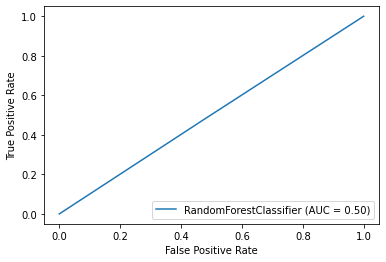

In [108]:
# Plot a ROC curve.

plot_roc_curve(rf, X_test, y_test)
plt.show()

# Generate a confusion matrix of the best model

In [109]:
# Generate a confusion matrix.
confusion_matrix(y_test, rf_y_pred)

array([[414,   0],
       [225,   0]])

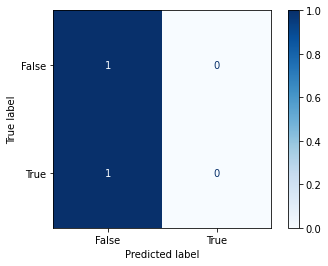

In [110]:
# Plot the confusion matrix.
plot_confusion_matrix(rf,
                     X_test,
                     y_test,
                     cmap = plt.cm.Blues,
                     normalize = 'true')
plt.show()

# Generate a feature importance plot for the best model

In [111]:
# This function generates a feature importance plot on a bar chart.

def feature_importance_plot(model, X_train, n):
    """Plots feature importance. This only works for random forest and XGBoost models."""
    
    plt.figure(figsize=(8, 5))  # Set figure size.
    feat_importances = pd.Series(model.feature_importances_,
                                 index = X_train.columns)
    feat_importances.nlargest(n).plot(kind = 'barh')
    plt.title(f'Top {n} Features')
    plt.show()

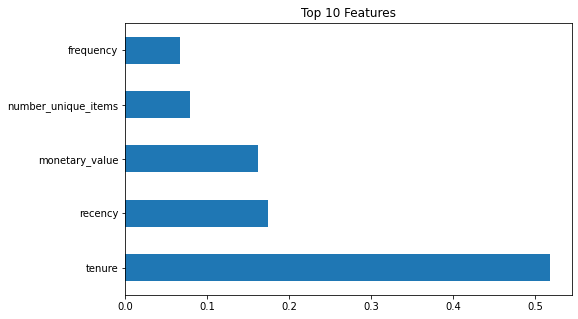

In [124]:
# Plot the feature importances.

feature_importance_plot(rf, X_train, 10)

# Plot a learning curve for the best model

In [ ]:
# This function generates and plots a learning curve.

def plot_learning_curves(model, X_train, y_train):
    """Plots learning curves for model validation."""
    
    plt.figure(figsize=(5, 5))  # Set figure size.
    train_sizes, train_scores, test_scores = learning_curve(model,
                                                            X_train,
                                                            y_train,
                                                            cv = 5,  # Number of folds in cross-validation.
                                                            scoring = 'accuracy',  # Evaluation metric.
                                                            n_jobs = 1,
                                                            shuffle = True,
                                                            train_sizes = np.linspace(0.01, 1.0, 5))  # 5 different sizes of the training set.

    # Create means and standard deviations of training set scores.
    
    train_mean = np.mean(train_scores, axis = 1)
    train_std = np.std(train_scores, axis = 1)

    # Create means and standard deviations of test set scores.
    
    test_mean = np.mean(test_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)

    # Draw lines.
    
    plt.plot(train_sizes, train_mean, '--', color = '#111111', label = 'Training score')
    plt.plot(train_sizes, test_mean, color = '#111111', label = 'Cross-validation score')
    
    # Create plot.
    
    plt.title('Learning Curves')
    plt.xlabel('Training Set Size'), plt.ylabel('Accuracy'), plt.legend(loc = 'best')
    plt.tight_layout()
    
    plt.show()

In [ ]:
# Call the function to plot learning curves for the best model.

plot_learning_curves(rf, X_train_norm, y_train)

# Save the best model

In [ ]:
# Save the best model as a pickle file named best_classification_model.pickle.
pickle.dump(rf, open('rf_classifier.pickle', 'wb'))